In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import GPy
import GPyOpt
from scipy.optimize import minimize, differential_evolution
from functionDoESpecial import functionDoESpecial, function_dimensions, function_names
from binomial_optimization2 import value_generator

%matplotlib inline

In [166]:
f_name = 'ackley1'

In [173]:
low_trials = 50
initial_size = 500
bound = 1
dims = 2

objective = lambda x: functionDoESpecial(x.reshape(1, -1), f_name)
if f_name in function_dimensions.keys():
    dims = function_dimensions[f_name]

lower_bounds = [-1 * bound] * dims
upper_bounds = [bound] * dims

space = []
for i in range(len(lower_bounds)):
    space.append({'name': 'x'+str(i), 'type': 'continuous', 'domain': (lower_bounds[i], upper_bounds[i])})

feasible_region = GPyOpt.Design_space(space=space)
init_design = GPyOpt.experiment_design.initial_design('random', feasible_region, initial_size)

#search max and min
argmin = differential_evolution(objective, [(-bound, bound)] * dims).x
argmax = differential_evolution(lambda x: -1 * objective(x), [(-bound, bound)] * dims).x
max_v = objective(argmax)
min_v = objective(argmin)
#normalize function
objective = lambda x: (functionDoESpecial(x, f_name) * 0.95 - min_v) / (max_v - min_v)

[-0.00679571]


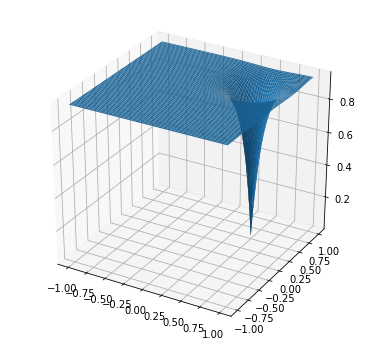

In [174]:
xs = np.linspace(-bound, bound, 300)
ys = np.linspace(-bound, bound, 300)
xs, ys = np.meshgrid(xs, ys)
values = objective(np.dstack([xs, ys]).reshape(90000, 2)).reshape(300, 300)
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(xs, ys, values, rstride=4, cstride=4, linewidth=0)
print(objective(argmin.reshape(1, -1)))

In [175]:
cs = np.linspace(1, 5, 20)
ratios = []
rs = []

In [176]:
for c in cs:
    high_trials = c * low_trials
    high_realiz = value_generator(init_design, objective, high_trials) / high_trials
    low_realiz = value_generator(init_design, objective, low_trials) / low_trials
    r = np.corrcoef(high_realiz.ravel(), low_realiz.ravel())[0, 1]
    rho = 1. / np.sqrt((1. / r**2 - 1)*0.0004)
#     rho=1
    rs += [r]
    ratios += [(1+(rho**(2*dims)/c**2)**(1/(dims+2)))**((dims+2)/dims)/(1+rho**2)]

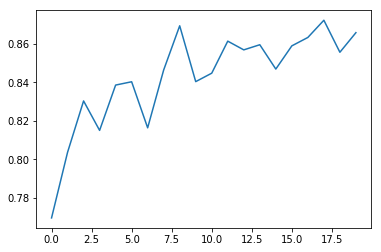

In [177]:
plt.plot(rs)

Text(0,0.5,'$R_2/R_1$')

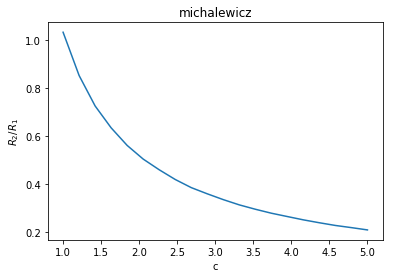

In [178]:
plt.plot(cs, ratios)
plt.title('michalewicz')
plt.xlabel('c')
plt.ylabel(r'$R_2/R_1$')